Convert fid file to np array

In [29]:
import numpy as np
import matplotlib.pyplot as plt    

Bruker uses little endian for raw files

In [30]:
folder = 'nmr_data/2'

In [54]:
byte_order = 0 # Set the byte order according to the data. 0 for little endian, 1 for big endian
fid_file = folder + '/fid'
if byte_order == 0: # little endian
    dtype = '<i4'
elif byte_order == 1: # big endian
    dtype = '>i4'

with open(fid_file, 'rb') as input_serial_file: 
    raw_data = np.frombuffer(input_serial_file.read(), dtype=dtype)

In [55]:
fid = raw_data[::2] + 1j * raw_data[1::2]  # Combine real and imaginary parts

In [56]:
fid.shape

(131072,)

In [57]:
def read_bruker_param(filename, param):
    with open(filename, "r") as f:
        for line in f:
            if line.startswith(f"##${param}="):
                value = line.split("=", 1)[1].strip()
                return int(value) 
    raise KeyError(f"Parameter {param} not found")
td = folder + '/acqus'
td = read_bruker_param(td, "TD")
assert len(fid) % td == 0, "Data length is not matching."    

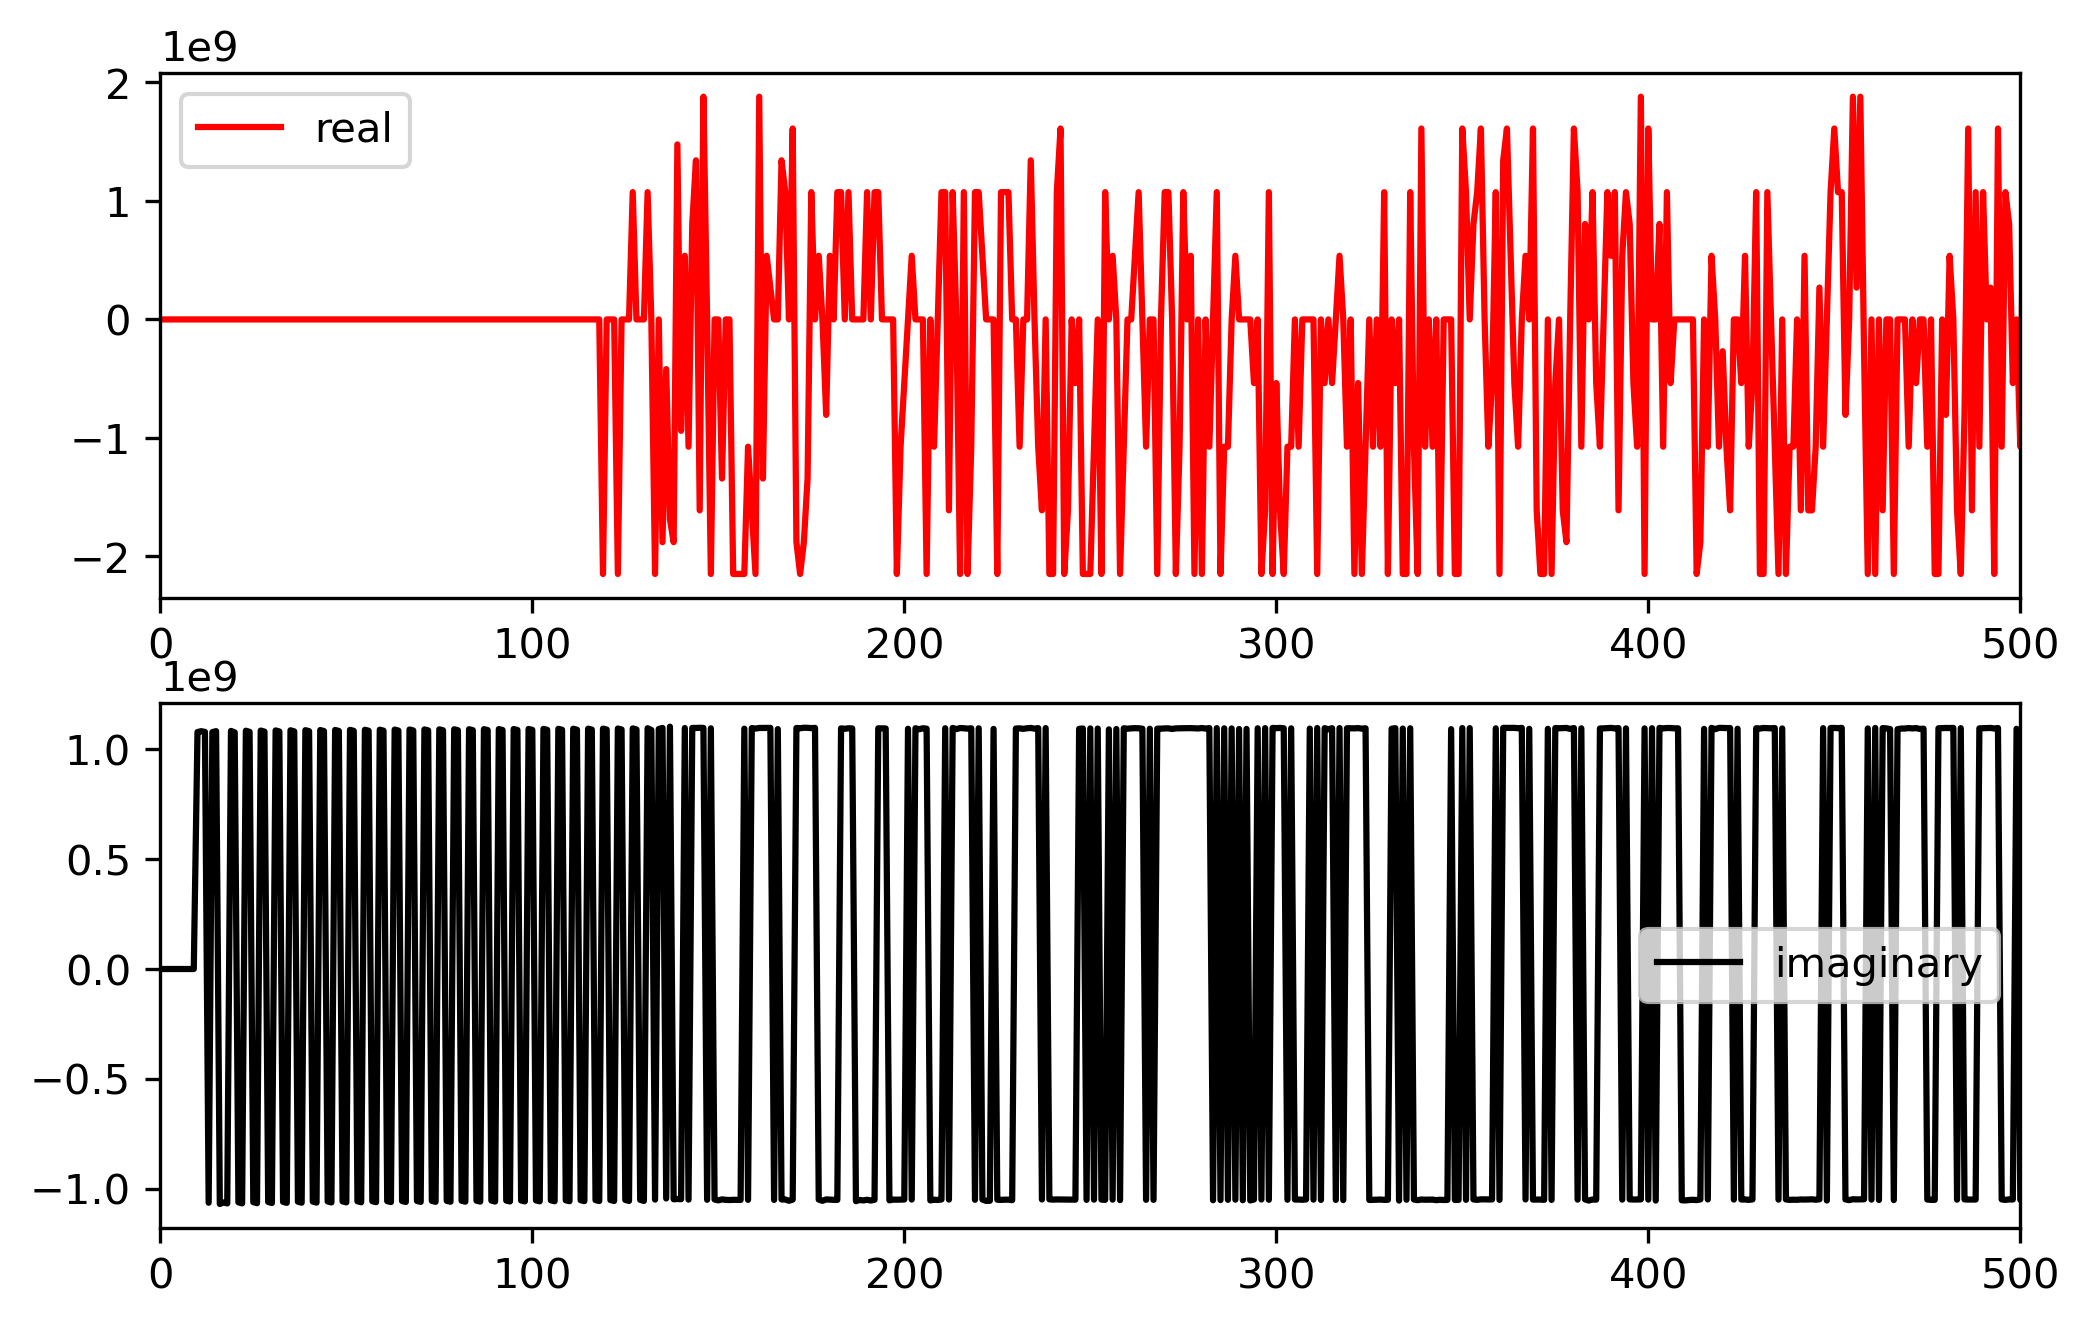

In [61]:
plt.figure(figsize=(8, 5), dpi=300)                   
plt.subplot(2, 1, 1)   
plt.plot(np.real(fid), c='r', label='real')  
plt.legend()                               
plt.xlim(0,500)
plt.subplot(2, 1, 2)                  
plt.plot(np.imag(fid),c='k', label='imaginary')
plt.legend()                               
plt.xlim(0,500)
plt.show()   